#  What will affect taxi drivers’ profit
## Aspect 1 What will increase the demand of taxi in New York? 

### SPORT and Weather  MAY INCREASE THE DEMAND OF TAXI

In [18]:
import geopandas as gpd

import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import folium
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster



In [19]:
full_month = pd.read_feather('18_cleaned_yellow_09.feather').drop('index', axis=1)

In [20]:
# https://en.wikipedia.org/wiki/2018_US_Open_%E2%80%93_Day-by-day_summaries
men_single = full_month[(full_month["date"]=="09-09")]
women_single = full_month[(full_month["date"]=="09-08")]

In [21]:
sf = gpd.read_file("E:/Uni/MAST30034/Data/taxi_zones/taxi_zones.shp")
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [22]:
# https://www.usopen.org/index.html
# https://en.wikipedia.org/wiki/2015_US_Open_(tennis) (August 31 – September 13)


# Venue : USTA Billie Jean King National Tennis Center https://www.latlong.net/convert-address-to-lat-long.html

Venue_coord = [40.750366,-73.845612]
Venue_coordM = np.array(Venue_coord)

# Men's Single

In [23]:
DO_count = men_single['DOLocationID'].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID":DO_count.index,"DO_Count": DO_count})
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)
#gdf['percentage']=gdf['DO_Count']/gdf["DO_Count"].sum()*100

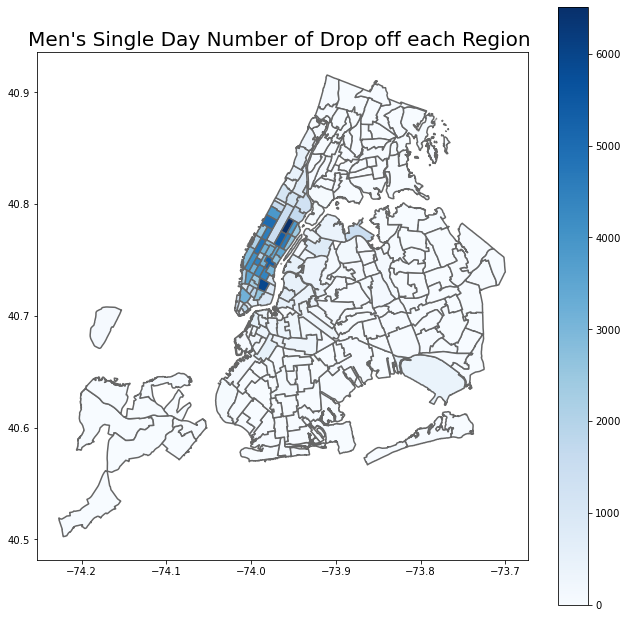

In [24]:
# set the value column that will be visualised
variable = 'DO_Count'
# set the range for the choropleth values
vmin, vmax = 0, gdf['DO_Count'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(11, 11))

# remove the axis
#ax.axis('off')

# add a title and annotation
ax.set_title("Men's Single Day Number of Drop off each Region ",  fontdict={'fontsize': '20', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)


# create map
gdf.plot(column=variable, cmap='Blues', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig("Men's Single Day Number of Drop off each Region.png")
plt.show()



In [25]:
m = folium.Map(location=[40.74, -73.94], tiles=None, zoom_start=10)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)

# refer to the folium documentations on how to plot aggregated data.
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data = gdf,
    columns=["OBJECTID","DO_Count"],
    key_on='feature.properties.OBJECTID',
     fill_opacity=1,
     line_opacity=0.3,
     legend_name='Mens Single Day Numbers of drop off'
).add_to(m)
feature = folium.FeatureGroup(name='<span style="color: blue;">Tennis Venue</span>').add_to(m)

folium.Marker(Venue_coord, popup='TUSTA Billie Jean King National Tennis Center',icon=folium.Icon(color='blue')).add_to(feature)

folium.map.LayerControl('topright', collapsed=False).add_to(m)


#folium.Circle(radius=600, location=Venue_coord,popup='TUSTA Billie Jean King National Tennis Center',color='#3186cc',fill=True,).add_to(m)
m.save('Mens_SingleChoroplethMap.html')
m

# Women's Single

In [26]:
DO_count = women_single['DOLocationID'].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID":DO_count.index,"DO_Count": DO_count})
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)
#gdf['percentage']=gdf['DO_Count']/gdf["DO_Count"].sum()*100

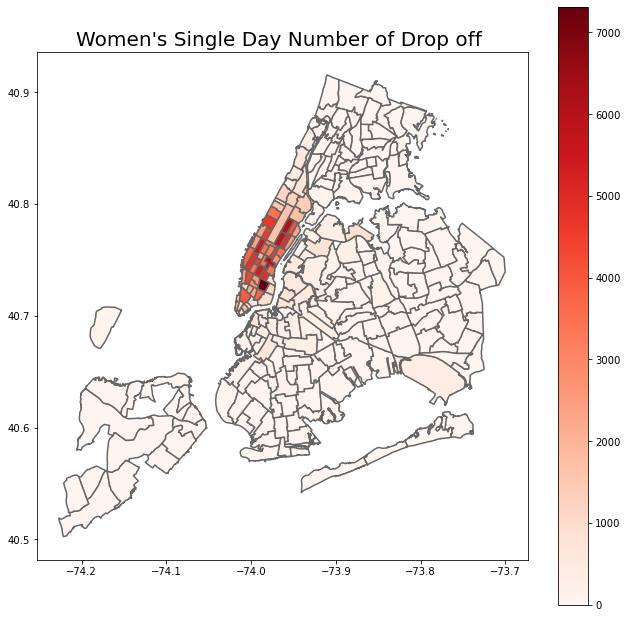

In [27]:
# set the value column that will be visualised
variable = 'DO_Count'
# set the range for the choropleth values
vmin, vmax = 0, gdf['DO_Count'].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(11, 11))

# remove the axis
#ax.axis('off')

# add a title and annotation
ax.set_title("Women's Single Day Number of Drop off ",  fontdict={'fontsize': '20', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)


# create map
gdf.plot(column=variable, cmap='Reds', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig("Women's Single Day : Percentage of Drop off.png")
plt.show()



In [28]:
m = folium.Map(location=[40.74, -73.94], tiles=None, zoom_start=10)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(m)

# refer to the folium documentations on how to plot aggregated data.
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data = gdf,
    columns=["OBJECTID","DO_Count"],
    key_on='feature.properties.OBJECTID',
    fill_color='Reds',
     fill_opacity=1,
     line_opacity=0.3,
     legend_name='Womens Single Day Percentage of drop off'
).add_to(m)
feature = folium.FeatureGroup(name='<span style="color: red;">Tennis Venue</span>').add_to(m)
folium.Marker(Venue_coord, popup='TUSTA Billie Jean King National Tennis Center',icon=folium.Icon(color='red')).add_to(feature)

folium.map.LayerControl('topright', collapsed=False).add_to(m)


#folium.Circle(radius=600, location=Venue_coord,popup='TUSTA Billie Jean King National Tennis Center',color='#3186cc',fill=True,).add_to(m)
m.save('Womens_SingleChoroplethMap.html')
m

## The sporting events may increase the demand of taxi

In [41]:
date_count = full_month['date'].value_counts().sort_index()
labels = date_count.index
x = np.arange(len(labels))  # the label locations

width = 0.35

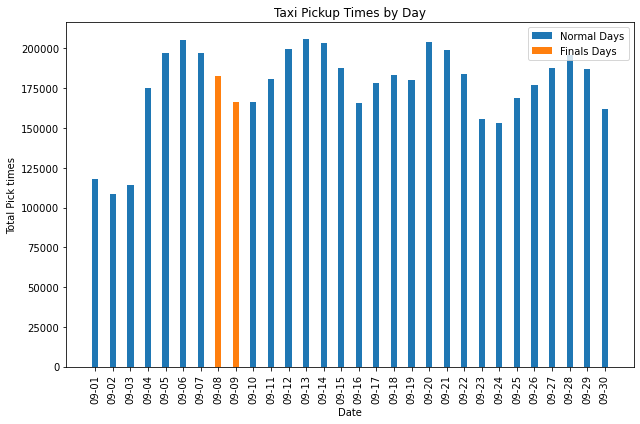

In [53]:
# high light the final days
final_bar_count = date_count.copy()
for i in range(len(final_bar_count)):
    if final_bar_count.index[i] not in ['09-08', '09-09']:
        final_bar_count[final_bar_count.index[i]] = 0


fig, ax = plt.subplots(figsize=(9,6))
normal_bar = ax.bar(x, date_count, width, label='Normal Days')
final_bar = ax.bar(x, final_bar_count, width, label='Finals Days')

#rects1[0].set_color('r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Pick times')
ax.set_title('Taxi Pickup Times by Day')
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

fig.tight_layout()

plt.show()
fig.savefig('Taxi Pickup Times by Day Fianl.png')

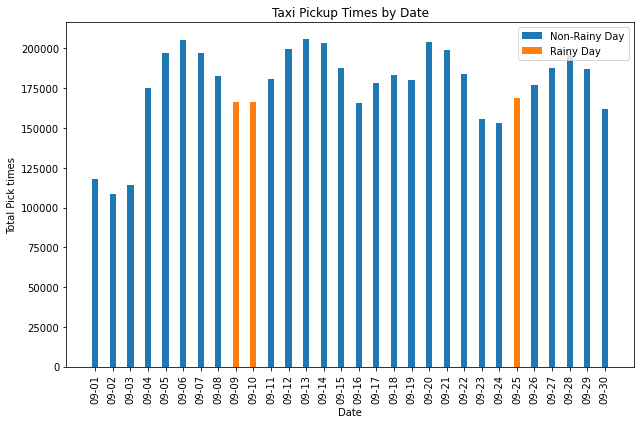

In [54]:
# high light the weekedn days
rain_bar_count = date_count.copy()
for i in range(len(rain_bar_count)):
    if rain_bar_count.index[i] not in ['09-09','09-10', '09-25']:
        rain_bar_count[rain_bar_count.index[i]] = 0


fig, ax = plt.subplots(figsize=(9,6))
work_bar = ax.bar(x, date_count, width, label='Non-Rainy Day')
weekend_bar = ax.bar(x, rain_bar_count, width, label='Rainy Day')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Pick times')
ax.set_title('Taxi Pickup Times by Date')
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

fig.tight_layout()

plt.show()
fig.savefig('Taxi Pickup Times by Day Rainy.png')
    

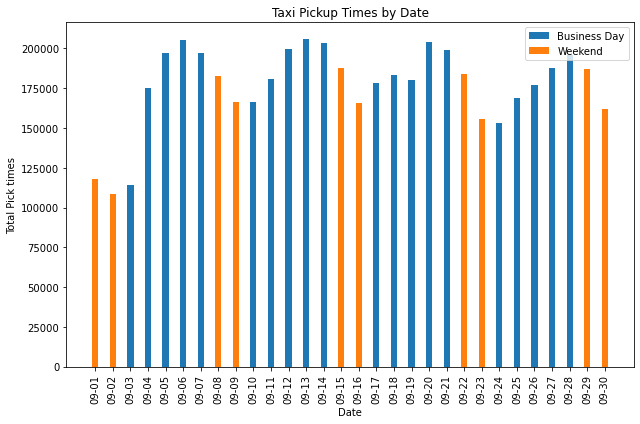

In [56]:
# high light the weekedn days
rain_bar_count = date_count.copy()
for i in range(len(rain_bar_count)):
    if rain_bar_count.index[i] not in ['09-01','09-02', '09-08','09-08','09-09', '09-15','09-16','09-22', '09-23','09-29', '09-30']:
        rain_bar_count[rain_bar_count.index[i]] = 0


fig, ax = plt.subplots(figsize=(9,6))
work_bar = ax.bar(x, date_count, width, label='Business Day')
weekend_bar = ax.bar(x, rain_bar_count, width, label='Weekend')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Pick times')
ax.set_title('Taxi Pickup Times by Date')
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)

fig.tight_layout()

plt.show()
fig.savefig('Taxi Pickup Times by Day weekend.png')